<a href="https://colab.research.google.com/github/uganthan2005/Stock-price-prediction/blob/main/StockPricePrediction_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import yfinance as yf

In [ ]:
stock_data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")

print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800
2020-01-06  72.582916  72.621654  70.876083  71.127873  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403633  73.706264  71.943744  71.943744  132079200


In [ ]:
data = stock_data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=['Close'])
print(data_scaled.head())

      Close
0  0.128204
1  0.123242
2  0.127269
3  0.124873
4  0.133029


In [ ]:
def create_features_targets(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size].values)
        y.append(data.iloc[i+window_size].values)
    return np.array(X), np.array(y)

window_size = 5
X, y = create_features_targets(data_scaled, window_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(800, 5)
(201, 5)


In [ ]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 7.20
Root Mean Squared Error: 9.83


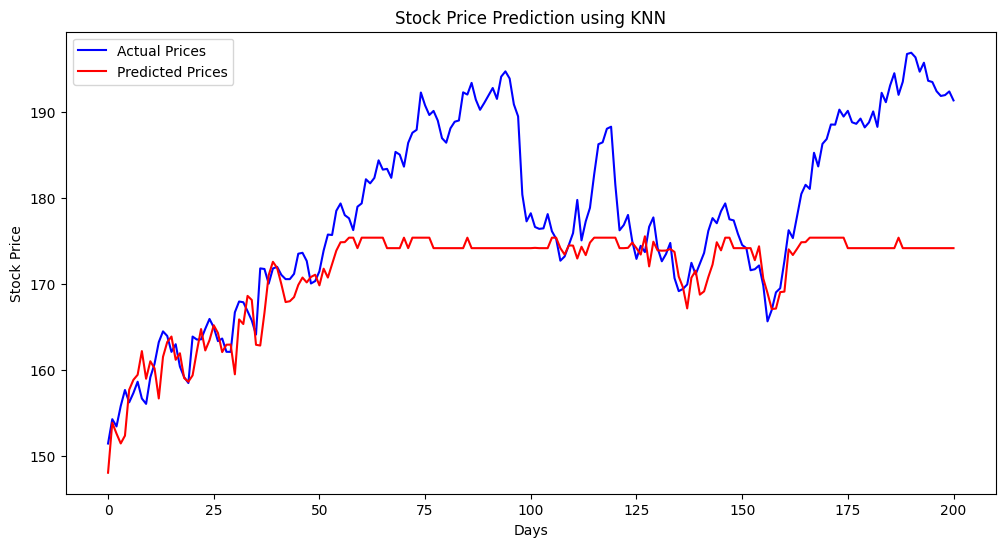

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(y_pred_actual, label="Predicted Prices", color="red")
plt.title("Stock Price Prediction using KNN")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()